In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from utils.metrics import UnbiasedExponentialMovingAverage as uema
from scipy.optimize import curve_fit
import datetime
import pytz
from math import nan

edmonton_tz = pytz.timezone('America/Edmonton')
start_time = datetime.time(9, 00)
end_time = datetime.time(21, 00)

716
716


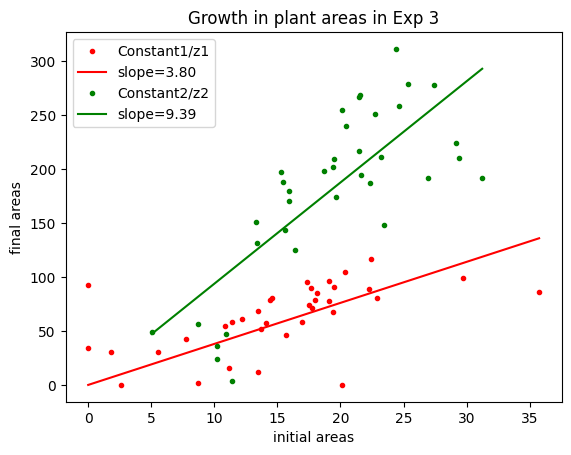

In [2]:
COLORS = ['r', 'g', 'b']
AGENTS = ['Constant1/z1', 'Constant2/z2']
f, ax = plt.subplots()
for i in range(2):
    agent = AGENTS[i]
    #data_path = os.path.dirname(os.path.abspath("")) + f'/analysis/plant_data/exp3/{agent}.csv'
    data_path = f'/home/lolanff/alien_data/E7/P2/{agent}/raw.csv'
    full_df = pd.read_csv(data_path)
    full_df['time'] = pd.to_datetime(full_df['time'])
    full_df['time'] = full_df['time'].dt.tz_convert(edmonton_tz)
    full_df['time_only'] = full_df['time'].dt.time
    df = full_df[(full_df['time_only'] >= start_time) & (full_df['time_only'] <= end_time)]

    areas = df['area'].to_numpy()
    areas = np.reshape(areas, (-1,36))
    print(areas.shape[0])
    
    init_areas = np.mean(areas[:5,:], axis=0)
    final_areas = np.mean(areas[-5:,:], axis=0)
    idx = np.argsort(init_areas)
    popt, pcov = curve_fit(lambda x, a: a * x, init_areas[idx], final_areas[idx])
    y_values = popt[0] * init_areas[idx] 

    ax.plot(init_areas[idx], final_areas[idx], '.', color=COLORS[i], label=agent)
    ax.plot(init_areas[idx], y_values, color=COLORS[i], label=f'slope={popt[0]:.2f}')

ax.set_xlabel('initial areas')
ax.set_ylabel('final areas')
ax.set_title("Growth in plant areas in Exp 3")
ax.legend()

Text(0.5, 0, 'Time Step')

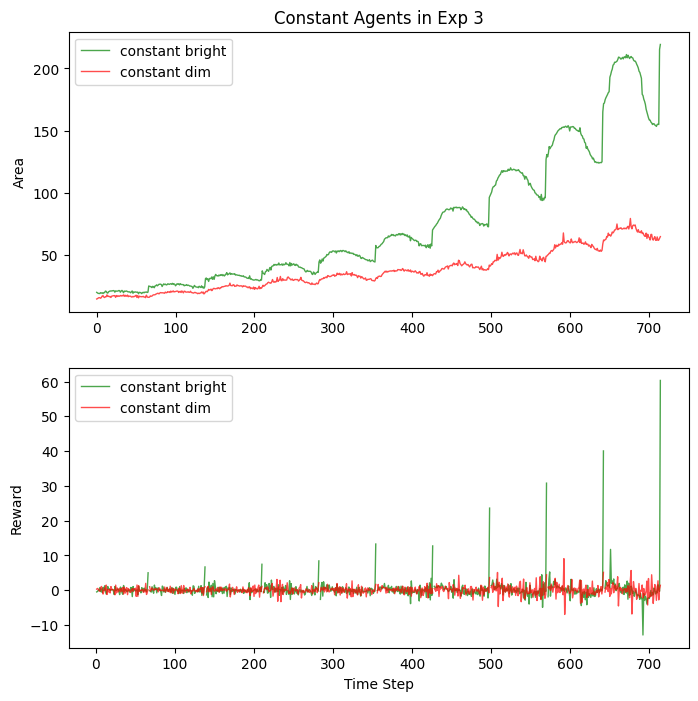

In [3]:
COLORS = ['g', 'r']
AGENTS = ['Constant2/z2', 'Constant1/z1']
NAMES = ['constant bright', 'constant dim']
f, ax = plt.subplots(2, 1, figsize=(8,8))
for i in range(2):
    agent = AGENTS[i]
    data_path = f'/home/lolanff/alien_data/E7/P2/{agent}/raw.csv'
    full_df = pd.read_csv(data_path)
    full_df['time'] = pd.to_datetime(full_df['time'])
    full_df['time'] = full_df['time'].dt.tz_convert(edmonton_tz)
    full_df['time_only'] = full_df['time'].dt.time
    df = full_df[(full_df['time_only'] >= start_time) & (full_df['time_only'] <= end_time)]

    areas = df['area'].to_numpy()
    areas = np.reshape(areas, (-1,36))
    area = np.array([np.mean(areas[i,:]) for i in range(areas.shape[0])])
    #area = area / np.mean(area[:5])   
    
    ax[0].plot(area, color=COLORS[i], label=NAMES[i], alpha=0.7, linewidth=1)
    ax[0].set_ylabel('Area')
    ax[0].legend()

    rewards = df['reward'].to_numpy()
    rewards = np.reshape(rewards, (-1,36))
    reward = rewards[:,0]
    invalid_idx = np.isnan(reward)

    norm_reward = np.diff(area)
    norm_reward = np.hstack([[np.nan], norm_reward])
    for j in np.argwhere(invalid_idx==True): 
        norm_reward[j] = nan
    
    ax[1].plot(norm_reward, color=COLORS[i], label=NAMES[i], alpha=0.7, linewidth=1)
    ax[1].set_ylabel('Reward')
    ax[1].legend()

ax[0].set_title("Constant Agents in Exp 3")
ax[1].set_xlabel('Time Step')


0.31018
0.11552
0.3384
0.12606
0.33436
0.15468


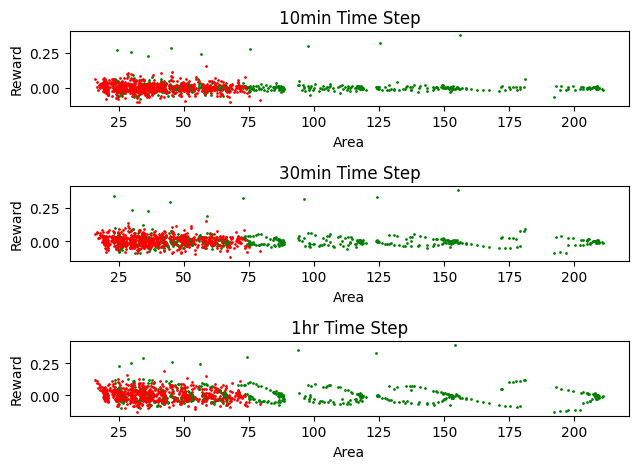

In [4]:
COLORS = ['g', 'r']
AGENTS = ['Constant2/z2', 'Constant1/z1']
NAMES = ['constant bright', 'constant dim']
TIME_STEP = [1, 3, 6]
TIME_STEP_NAME = ['10min', '30min', '1hr']

f, ax = plt.subplots(3, 1)
for t in range(3):
    time_step = TIME_STEP[t] 

    for i in range(2):
        agent = AGENTS[i]
        data_path = f'/home/lolanff/alien_data/E7/P2/{agent}/raw.csv'
        full_df = pd.read_csv(data_path)
        unique_episodes = sorted(full_df['episode'].unique())

        R = []
        A = []
        for j in unique_episodes[1:-1]:
            df = full_df[full_df['episode'] == j]
            areas = df['area'].to_numpy()
            areas = np.reshape(areas, (-1,36))
            area = np.array([np.mean(areas[i,:]) for i in range(areas.shape[0])])

            reward = area[time_step:] / area[:-time_step] - 1
            R.append(reward)
            A.append(area[:-time_step])

        R = np.hstack(R)
        A = np.hstack(A)
                
        ax[t].plot(A, R, '.', color=COLORS[i], label=NAMES[i], markersize=2)

        idx = np.argsort(R)
        print(round(np.mean(R[idx[-5:]]),5))
            
    ax[t].set_ylabel('Reward')
    ax[t].set_title(f"{TIME_STEP_NAME[t]} Time Step")
    ax[t].set_xlabel('Area')
f.tight_layout()

In [5]:
new = 132.03
steps = 534 - 28
old = 32.85

total_growth = new / old - 1
growth_per_step1 = total_growth / steps
growth_per_step2 = (total_growth + 1)**(1 / steps) - 1
print(growth_per_step1, growth_per_step2)

0.005966755103145811 0.002752947289786256


27.548327947363312
12.053872852909674


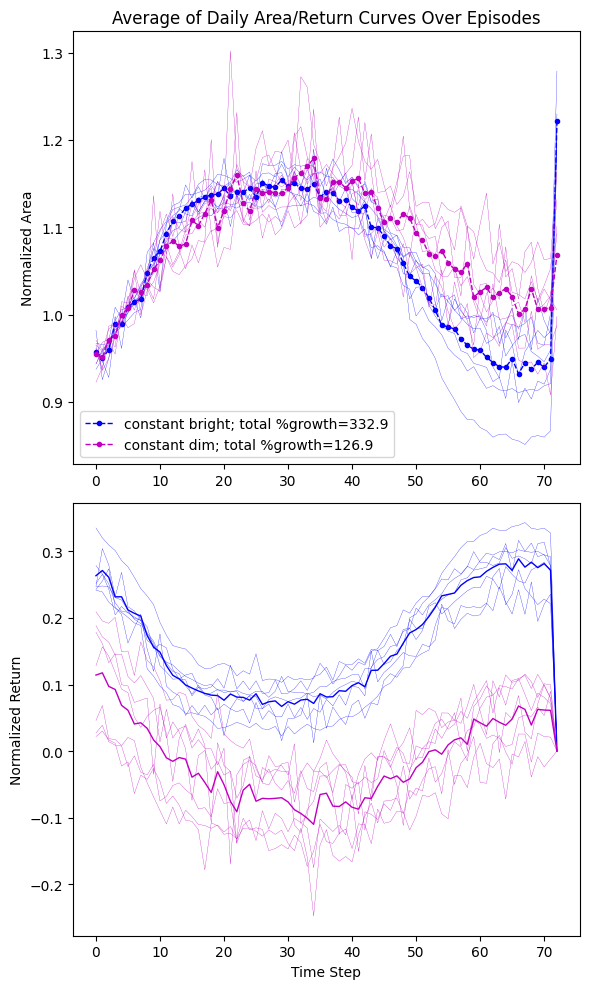

In [7]:
COLORS = ['b', 'g', 'r', 'c', 'y', 'm']
AGENTS = ['P2/Constant2/z2', 'P3/ESARSA3/z3',  'P4/LinearESARSA8/z8', 'P4/LinearESARSA6/z6', 'P4/LinearESARSA9/z9', 'P2/Constant1/z1']
NAMES = ['constant bright', 'bandit',  'ESARSA(0); alpha=0.1', 'context bandit', 'ESARSA(0); alpha=0.25', 'constant dim']

f, ax = plt.subplots(2, 1, figsize=(6,10))
for i in [0, 5]:
    agent = AGENTS[i]
    data_path = f'/home/lolanff/alien_data/E7/{agent}/raw.csv'
    full_df = pd.read_csv(data_path)
    unique_episodes = sorted(full_df['episode'].unique())

    # Estimate total % growth
    unique_episodes = unique_episodes[-8:-1]  # keep the same number of complete episodes across agents
    full_df = full_df[(full_df['episode'] >= min(unique_episodes)) & (full_df['episode'] <= max(unique_episodes))]
    full_areas = full_df['area'].to_numpy()
    full_areas = np.reshape(full_areas, (-1,36))
    full_area = np.array([np.mean(full_areas[i,:]) for i in range(full_areas.shape[0])])
    old = np.mean(np.sort(full_area)[:100])   # use the smallest 100 areas to estimate the initial small area
    new = np.mean(np.sort(full_area)[-100:])  # use the largest 100 areas to estimate the final large area
    total_growth = new / old - 1

    A = []
    daily_growth = []
    for j in unique_episodes:
        df = full_df[full_df['episode'] == j]
        areas = df['area'].to_numpy()
        areas = np.reshape(areas, (-1,36))
        area = np.array([np.mean(areas[i,:]) for i in range(areas.shape[0])])
        
        # Estimate daily percentage growth
        daily_growth.append(area[-1] / area[0] - 1)

        # Normalize area curves
        norm = np.mean(area[:10]) #np.mean(np.sort(area)[-10:])
        area = area / norm
        A.append(area)
        
    print(100*np.mean(daily_growth))

    A = np.vstack(A)            
    ax[0].plot(A.T, color=COLORS[i], linewidth=0.2)
    mean_curve = np.mean(A, axis=0)
    ax[0].plot(mean_curve, '.--', color=COLORS[i], label=f'{NAMES[i]}; total %growth={100*total_growth:.1f}', linewidth=1)
    ax[0].legend()

    R = np.array([a[-1] - a for a in A])
    ax[1].plot(R.T, color=COLORS[i], linewidth=0.2)
    ax[1].plot(np.mean(R, axis=0), color=COLORS[i], linewidth=1)

ax[0].set_ylabel('Normalized Area')
ax[1].set_ylabel('Normalized Return')
ax[0].set_title(f"Average of Daily Area/Return Curves Over Episodes")
ax[1].set_xlabel('Time Step')
f.tight_layout()

Text(0.5, 1.0, 'Mean=-0.239, 0.032, 0.167')

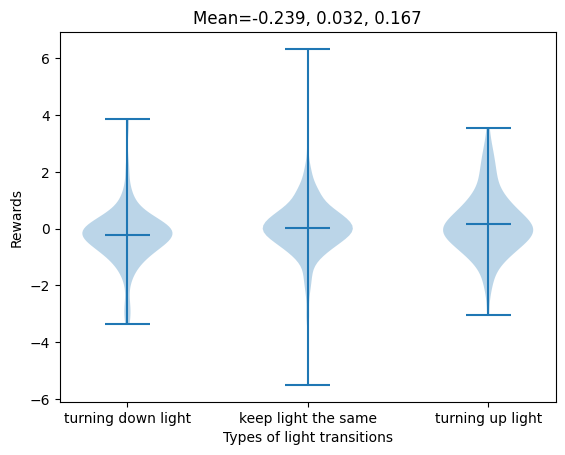

In [ ]:
AGENTS = ['P4/LinearESARSA6/z6', 'P4/LinearESARSA8/z8', 'P4/LinearESARSA9/z9', 'P3/ESARSA3/z3']
down_reward = []
up_reward = []
flat_reward = []
f, ax = plt.subplots()
for i in range(4):
    agent = AGENTS[i]
    data_path = f'/home/lolanff/alien_data/E7/{agent}/raw.csv'
    full_df = pd.read_csv(data_path)
    unique_episodes = sorted(full_df['episode'].unique())

    for j in unique_episodes[1:-1]:
        df = full_df[full_df['episode'] == j]
        areas = df['area'].to_numpy()
        areas = np.reshape(areas, (-1,36))
        area = np.array([np.mean(areas[i,:]) for i in range(areas.shape[0])])
        area = area[:-1]   # remove overnight reward

        actions = df['agent_action'].to_numpy()
        actions = np.reshape(actions, (-1,36))
        action = actions[:, 0]
        
        down_idx = np.argwhere(np.diff(action) == -1).T
        up_idx = np.argwhere(np.diff(action) == 1).T
        flat_idx = np.argwhere(np.diff(action) == 0).T

        down_reward.append(area[down_idx + 1] - area[down_idx])
        up_reward.append(area[up_idx + 1] - area[up_idx])
        flat_reward.append(area[flat_idx + 1] - area[flat_idx])

down_reward = np.hstack(down_reward)[0]
up_reward = np.hstack(up_reward)[0]
flat_reward = np.hstack(flat_reward)[0]

ax.violinplot([down_reward, flat_reward, up_reward], showmeans=True)

ax.set_xticks([1, 2, 3], labels=['turning down light', 'keep light the same', 'turning up light'])
ax.set_xlabel('Types of light transitions')
ax.set_ylabel('Rewards')
ax.set_title(f'Mean={np.mean(down_reward):.3f}, {np.mean(flat_reward):.3f}, {np.mean(up_reward):.3f}')

In [ ]:
area = np.array([np.mean(areas[i,:]) for i in range(areas.shape[0])])
#area =  np.array([np.mean(areas[,i]) for i in range(areas.shape[1])])

In [ ]:
area_trace = uema(alpha=0.01)
area_trace.update(area[0])
smooth_area = [area_trace.compute().item()]
r1 = np.hstack([[0], np.diff(area)])
r2 = []
r3 = []
m = 18
for i in range(1, len(area)):
    area_trace.update(area[i])
    smooth_area.append(area_trace.compute().item())

    if i % m == 0 and i >= 2*m:
        r2.append(np.mean(area[i-m:i]) - np.mean(area[i-m*2:i-m]))
        r3.append(smooth_area[-1] - smooth_area[-1-m])
    else: 
        r2.append(0)
        r3.append(0)
    
r2 = np.array(r2)
r3 = np.array(r3)

def R(x):
    return np.flip(np.cumsum(np.flip(x)))

Text(0.5, 0, 'Daytime Time Step')

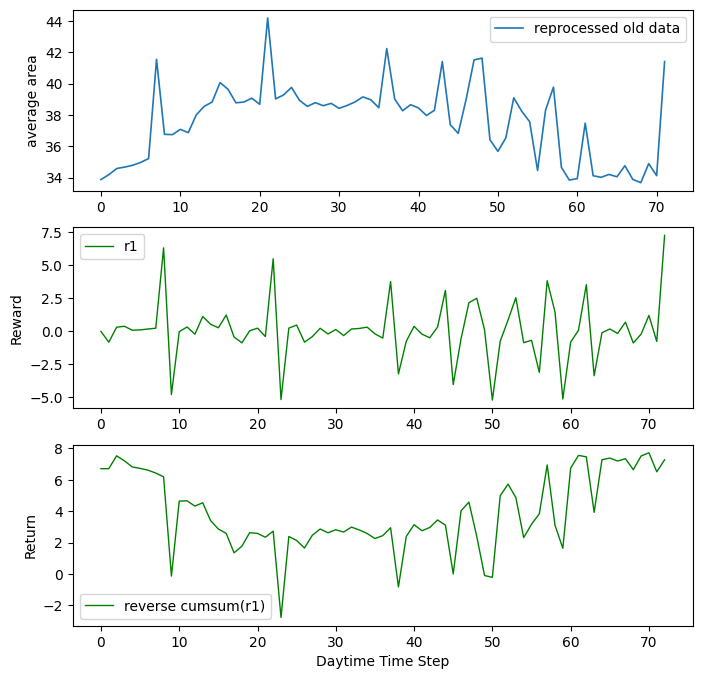

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,8))
ax[0].plot(area[1:], linewidth=1.2, label='reprocessed old data')
ax[0].legend()
ax[0].set_ylabel('average area')
ax[1].plot(r1, 'g', linewidth=1, alpha=1, label='r1')
#ax[1].plot(r2, 'r', linewidth=1,alpha=0.7, label='r2')
ax[1].legend()
ax[1].set_ylabel('Reward')
#ax[1].set_ylim(-20,20)
ax[2].plot(R(r1), 'g', linewidth=1, alpha=1,label='reverse cumsum(r1)')
#ax[2].plot(R(r2), 'r', linewidth=1, alpha=0.7,label='reverse cumsum(r2)')
ax[2].legend()
ax[2].set_ylabel('Return')
ax[2].set_xlabel('Daytime Time Step')